In [1]:
import pandas as pd
import numpy as np
import os,sys
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

os.chdir('/data/arpit.goel/33_GrocerySales/')


In [45]:
os.listdir('02.ParsedData/')

['oil.pkl',
 'transactions.pkl',
 'holidays.pkl',
 'items.pkl',
 'train.pkl',
 'stores.pkl',
 'test.pkl',
 'sample_submission.pkl']

In [47]:
oil=pd.read_pickle('02.ParsedData/oil.pkl')
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [54]:
oil['dcoilwtico'].isnull().sum(),oil['dcoilwtico'].describe()

(43, count    1175.000000
 mean       67.714366
 std        25.630476
 min        26.190000
 25%        46.405000
 50%        53.190000
 75%        95.660000
 max       110.620000
 Name: dcoilwtico, dtype: float64)

In [28]:
items=pd.read_csv('01.RawData/items.csv')

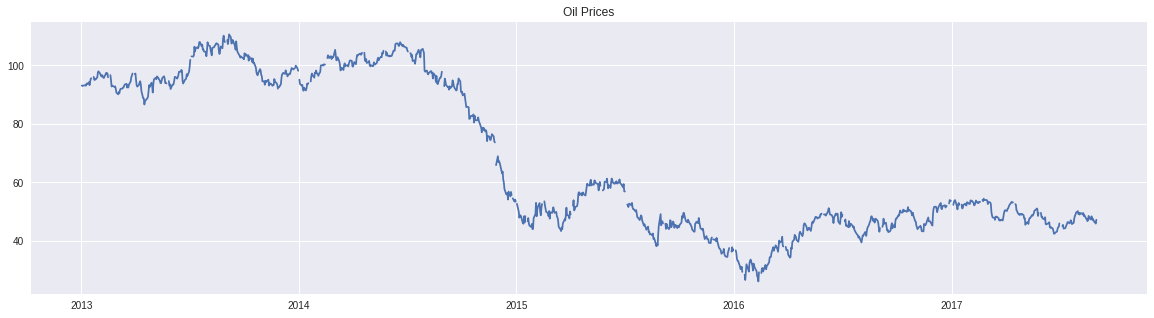

In [65]:
plt.figure(figsize=(20,5))
plt.plot(oil['date'],oil['dcoilwtico'])
plt.title('Oil Prices')

In [2]:
holidays=pd.read_pickle('02.ParsedData/holidays.pkl')
holidays.head()

transactions=pd.read_pickle('02.ParsedData/transactions.pkl')
transactions.head()

transactions['flag_holiday']=transactions['date'].isin(holidays['date'])

FileNotFoundError: [Errno 2] No such file or directory: '02.ParsedData/transactions.pkl'

In [81]:
transactions.apply(lambda x: np.unique(x).shape,axis=0)

date                    (1682,)
store_nbr                 (54,)
transactions            (4993,)
holiday_transactions    (3586,)
dtype: object

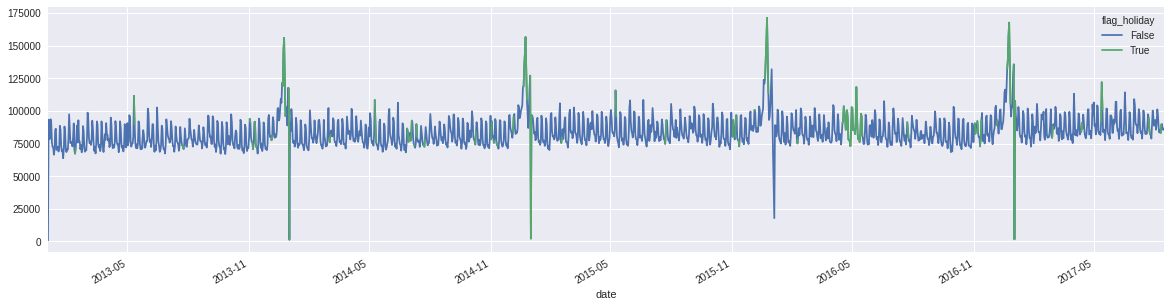

In [95]:
transactions_summary=transactions.groupby(['date','flag_holiday'])['transactions'].sum().unstack()
transactions_summary.loc[:,False]=transactions_summary.fillna(0).sum(axis=1)
transactions_summary.plot(figsize=(20,5))

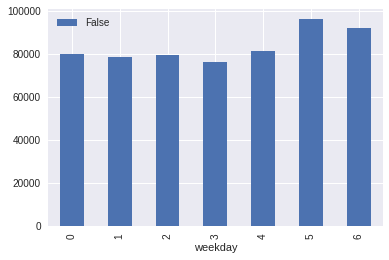

In [116]:
non_holiday_txn=transactions.groupby(['date','flag_holiday'])['transactions'].sum().unstack()
non_holiday_txn=non_holiday_txn.loc[:,False].reset_index().dropna()
non_holiday_txn.loc[:,'weekday']=non_holiday_txn.loc[:,'date'].dt.dayofweek
non_holiday_txn.groupby('weekday').mean().plot(kind='bar')


In [117]:
items=pd.read_pickle('02.ParsedData/items.pkl')
items.head()


,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [118]:
print (items['family'].drop_duplicates().shape,items['class'].drop_duplicates().shape,items[['family','class']].drop_duplicates().shape)

(33,) (337,) (337, 2)


(4100, 4) 0    3114
1     986
Name: perishable, dtype: int64


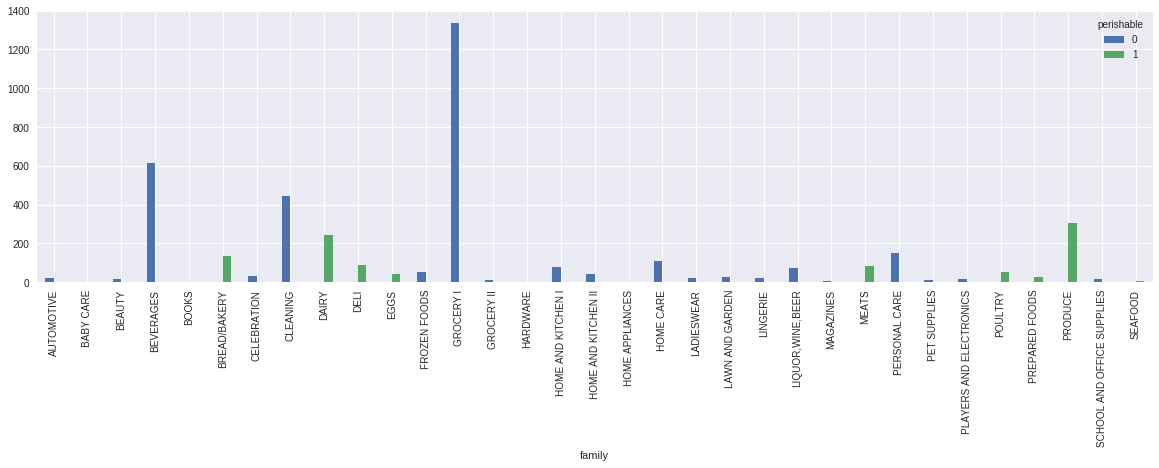

In [147]:
print (items.shape,items['perishable'].value_counts())
pd.crosstab(items['family'],items['perishable']).plot(kind='bar',figsize=(20,5))

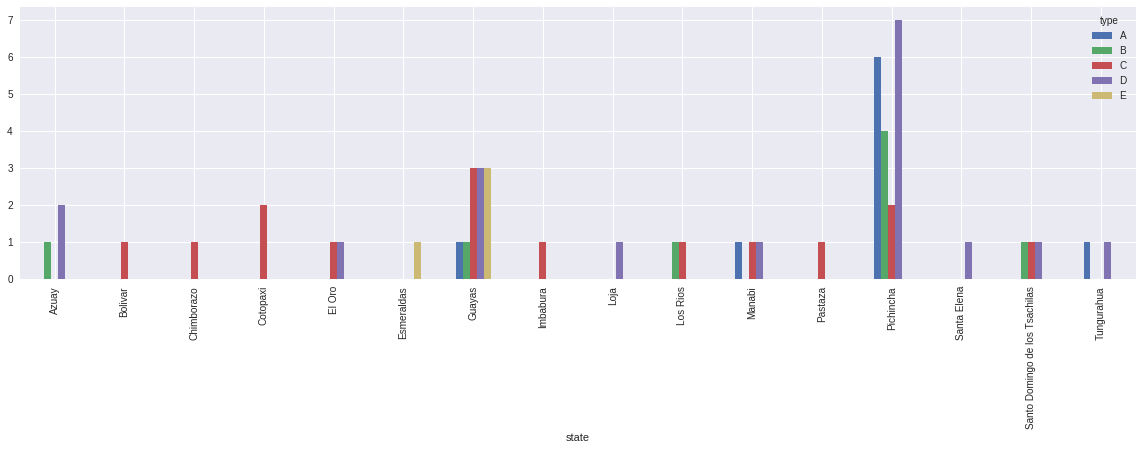

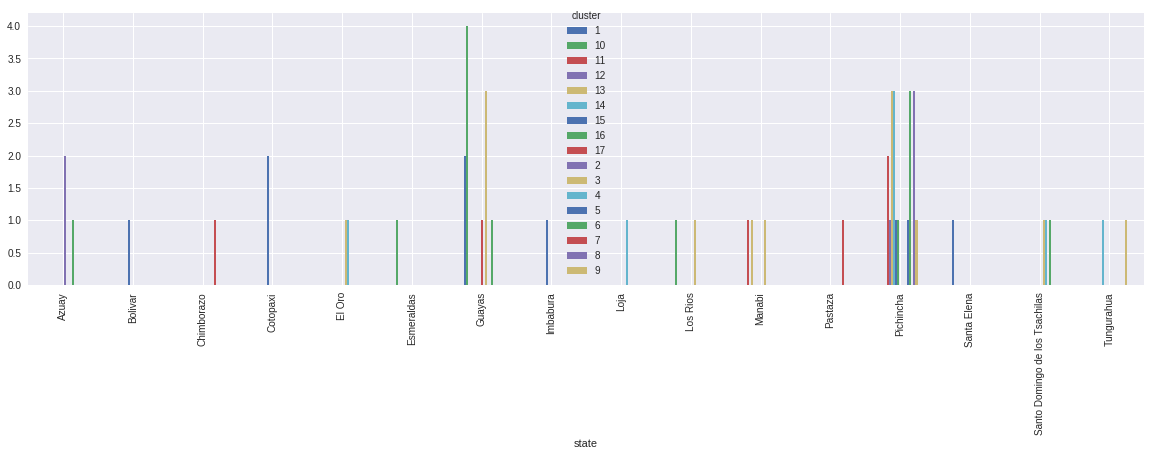

In [148]:
stores=pd.read_pickle('02.ParsedData/stores.pkl')
pd.crosstab(stores['state'],stores['type']).plot(kind='bar',figsize=(20,5))
pd.crosstab(stores['state'],stores['cluster']).plot(kind='bar',figsize=(20,5))


In [3]:
dtypes={'store_nbr':'category','transactions':np.int64}
df=pd.read_csv('01.RawData/transactions.csv',dtype=dtypes,parse_dates=['date'])

In [24]:
from datetime import timedelta,datetime
df['month']=df.date.map(lambda x: x-timedelta(days=(x.day-1)%16))
a=df.groupby(['store_nbr','month'])['transactions'].sum().unstack()

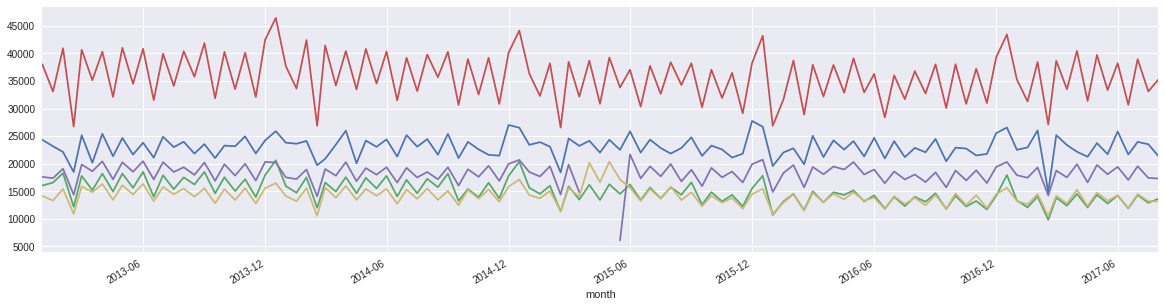

In [25]:
for row in a.head().iterrows():
    row[1].plot(figsize=(20,5))

In [27]:
a.loc[:,datetime(2016,7,1):].head()

month,2016-07-01 00:00:00,2016-07-17 00:00:00,2016-08-01 00:00:00,2016-08-17 00:00:00,2016-09-01 00:00:00,2016-09-17 00:00:00,2016-10-01 00:00:00,2016-10-17 00:00:00,2016-11-01 00:00:00,2016-11-17 00:00:00,...,2017-03-17 00:00:00,2017-04-01 00:00:00,2017-04-17 00:00:00,2017-05-01 00:00:00,2017-05-17 00:00:00,2017-06-01 00:00:00,2017-06-17 00:00:00,2017-07-01 00:00:00,2017-07-17 00:00:00,2017-08-01 00:00:00
store_nbr,,,,,,,,,,,,,,,,,,,,,
1,24081.0,21177.0,22853.0,22062.0,24473.0,20426.0,22897.0,22728.0,21484.0,21757.0,...,23367.0,22150.0,21246.0,23721.0,21705.0,25831.0,21648.0,23942.0,23515.0,21395.0
10,13960.0,12273.0,13969.0,13065.0,14613.0,11761.0,14163.0,12217.0,13201.0,11675.0,...,12352.0,14498.0,12048.0,14331.0,12753.0,14206.0,11853.0,14292.0,12878.0,13612.0
11,36032.0,31701.0,36785.0,32738.0,38028.0,30104.0,38049.0,30849.0,37237.0,30999.0,...,33504.0,40476.0,31380.0,39720.0,33356.0,38229.0,30672.0,38965.0,33107.0,35268.0
12,18566.0,17125.0,18022.0,16644.0,18405.0,15682.0,18744.0,16946.0,18792.0,16461.0,...,17495.0,19888.0,16579.0,19750.0,18065.0,19410.0,17028.0,19526.0,17405.0,17289.0
13,14090.0,12642.0,13805.0,12418.0,14310.0,11755.0,14567.0,12463.0,14269.0,11924.0,...,12730.0,15255.0,12316.0,14747.0,13238.0,14262.0,11941.0,14474.0,13171.0,13142.0
